In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("/Users/guapofish/Desktop/stock.xlsx")
df.head()

,Week,A,B,C,D
0,1,115,65,210,320
1,2,117,67,220,325
2,3,118,68,222,315
3,4,121,63,221,316
4,5,119,64,209,325


In [3]:
# part a
df['Return_A'] = df.A.pct_change()
df['Return_B'] = df.B.pct_change()
df['Return_C'] = df.C.pct_change()
df['Return_D'] = df.D.pct_change()
df.head(10)

,Week,A,B,C,D,Return_A,Return_B,Return_C,Return_D
0,1,115,65,210,320,NaN,NaN,NaN,NaN
1,2,117,67,220,325,0.017391,0.030769,0.047619,0.015625
2,3,118,68,222,315,0.008547,0.014925,0.009091,-0.030769
3,4,121,63,221,316,0.025424,-0.073529,-0.004505,0.003175
4,5,119,64,209,325,-0.016529,0.015873,-0.054299,0.028481
5,6,114,65,212,320,-0.042017,0.015625,0.014354,-0.015385
6,7,120,71,205,325,0.052632,0.092308,-0.033019,0.015625
7,8,122,72,200,327,0.016667,0.014085,-0.024390,0.006154
8,9,123,73,205,325,0.008197,0.013889,0.025000,-0.006116
9,10,116,70,210,320,-0.056911,-0.041096,0.024390,-0.015385


In [4]:
# part b 
Expected_return_A = df['Return_A'].mean()
Expected_return_B = df['Return_B'].mean()
Expected_return_C = df['Return_C'].mean()
Expected_return_D = df['Return_D'].mean()

print("The expected return of A is {:%}".format(Expected_return_A))
print("The expected return of B is {:%}".format(Expected_return_B))
print("The expected return of C is {:%}".format(Expected_return_C))
print("The expected return of D is {:%}".format(Expected_return_D))


The expected return of A is 0.748611%
The expected return of B is 1.210237%
The expected return of C is 0.501347%
The expected return of D is 0.266224%


In [5]:
# part c
df1 = df[['Return_A','Return_B','Return_C','Return_D']]
df1.cov()

,Return_A,Return_B,Return_C,Return_D
Return_A,0.001414,0.000847,0.000072,0.000095
Return_B,0.000847,0.001665,0.000019,0.000448
Return_C,0.000072,0.000019,0.000821,-0.000245
Return_D,0.000095,0.000448,-0.000245,0.001237


# Problem 4
-- Method 1 (Simulation)

In [6]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = 4
num_portfolios = 10000


In [7]:
# calculate monthly and annual returns of the stocks
returns_weekly = df1
returns_annual = (returns_weekly.mean() + 1)**52 - 1

# get monthly and covariance of returns of the stock
cov_monthly = returns_weekly.cov()
cov_annual = cov_monthly*52

In [8]:
returns_annual, cov_annual

(Return_A    0.473776
 Return_B    0.869266
 Return_C    0.296994
 Return_D    0.148265
 dtype: float64,
           Return_A  Return_B  Return_C  Return_D
 Return_A  0.073508  0.044068  0.003739  0.004922
 Return_B  0.044068  0.086567  0.000984  0.023317
 Return_C  0.003739  0.000984  0.042694 -0.012717
 Return_D  0.004922  0.023317 -0.012717  0.064342)

In [9]:
# populate the empty lists with each portfolios returns,risk and weights
for i in range(num_portfolios):
    weights = np.random.uniform(0,1,num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [10]:
# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

selected = ['Asset A','Asset B','Asset C','Asset D']

In [11]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,Asset A weight,Asset B weight,Asset C weight,Asset D weight
0,0.316391,0.179638,0.319038,0.076594,0.060859,0.543509
1,0.482674,0.158958,0.217220,0.302313,0.307495,0.172972
2,0.537673,0.196375,0.121032,0.466271,0.092979,0.319718
3,0.331639,0.153462,0.284977,0.084557,0.199324,0.431142
4,0.436492,0.186654,0.294640,0.256999,0.047209,0.401151


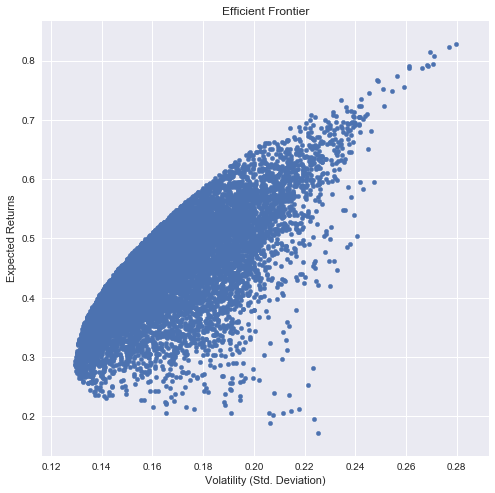

In [12]:
# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(8, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [13]:
#desired stardard deviation is less than 7%
df_new = df.loc[df['Volatility'] < 0.07]
df_new

,Returns,Volatility,Asset A weight,Asset B weight,Asset C weight,Asset D weight


In [14]:
df['Volatility'].max()

0.27950303925383835

In [15]:
#no such weight, try 7% as weekly, then annual vol is sqrt(0.07) = 0.2646
df_new = df.loc[df['Volatility'] < 0.2646]
df_new

,Returns,Volatility,Asset A weight,Asset B weight,Asset C weight,Asset D weight
0,0.316391,0.179638,0.319038,0.076594,0.060859,0.543509
1,0.482674,0.158958,0.217220,0.302313,0.307495,0.172972
2,0.537673,0.196375,0.121032,0.466271,0.092979,0.319718
3,0.331639,0.153462,0.284977,0.084557,0.199324,0.431142
4,0.436492,0.186654,0.294640,0.256999,0.047209,0.401151
...,...,...,...,...,...,...
9995,0.480084,0.162806,0.250791,0.294085,0.256495,0.198629
9996,0.468355,0.156374,0.088208,0.287975,0.563089,0.060728
9997,0.354612,0.142752,0.167453,0.149045,0.298381,0.385121
9998,0.436986,0.174593,0.148278,0.305205,0.137176,0.409341


In [16]:
#pick the max expected return given the certain condition
pick1_index = df_new.Returns.idxmax()
df_new.loc[pick1_index]

Returns           0.791206
Volatility        0.261191
Asset A weight    0.040800
Asset B weight    0.857337
Asset C weight    0.077453
Asset D weight    0.024410
Name: 1380, dtype: float64

In [17]:
# go with 45%
df_new2 = df.loc[df['Returns'] >= 0.45]

#pick the max expected return given the certain condition
pick2_index = df_new2.Volatility.idxmin()
df_new2.loc[pick2_index]

Returns           0.453653
Volatility        0.147534
Asset A weight    0.075409
Asset B weight    0.296442
Asset C weight    0.451203
Asset D weight    0.176946
Name: 1635, dtype: float64

-- Method 2:

In [18]:
from scipy.optimize import minimize
target_vol = 0.07
target_ret = 0.45

class cal_weight(): 
    
    
    def __init__(self,returns_annual,cov_annual):
        self.returns_annual = returns_annual
        self.cov_annual = cov_annual
            
    
    def calc_fct(self,weights):
        r = np.sum(np.array(weights)*self.returns_annual)
        vol = np.sqrt(np.dot(np.array(weights).T,np.dot(self.cov_annual,np.array(weights))))
        return (r, vol)

    
    def ret_fct(self,weights): 
        return -self.calc_fct(weights)[0]

    
    def vol_fct(self,weights):
        return self.calc_fct(weights)[1]

    
    def weight_vol_cons(self,target_vol):
        
        bounds = ((-1,1),(-1,1),(-1,1),(-1,1))
        init_guess = [0.25, 0.25, 0.25, 0.25]

        cons = ({'type':'eq','fun': lambda x: np.sum(x)-1,
            'type':'eq','fun': lambda x: self.vol_fct(x)-target_vol})

        max_ret_w = minimize(self.ret_fct, init_guess,# args=args,
                     method='SLSQP', bounds=bounds, constraints=cons)
        
        return max_ret_w
        
    
    def weight_ret_cons(self,target_ret):
        
        bounds = ((-1,1),(-1,1),(-1,1),(-1,1))
        init_guess = [0.25, 0.25, 0.25, 0.25]
        

        cons = ({'type':'eq','fun': lambda x: np.sum(x)-1,
            'type':'eq','fun': lambda x: -self.ret_fct(x)-target_ret})

        max_ret_w = minimize(self.vol_fct, init_guess,# args=args,
                     method='SLSQP', bounds=bounds, constraints=cons)
        
        
        return max_ret_w
        


In [19]:
w1 = cal_weight(returns_annual,cov_annual)
w1 = w1.weight_vol_cons(target_vol)
print(w1)

     fun: -0.2285694547696498
     jac: array([-0.47377596, -0.8692657 , -0.29699385, -0.14826532])
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.00412673, 0.21127285, 0.14417742, 0.00095949])


In [20]:
ret_1 = -cal_weight(returns_annual,cov_annual).ret_fct(list(w1['x']))
vol_1 = cal_weight(returns_annual,cov_annual).vol_fct(list(w1['x']))
print("The maximum annual return given the annual volatility no more than 7% is {:%}".format(round(ret_1,4)))
print("Here the annual volatility is {:%}".format(round(vol_1,4)))

The maximum annual return given the annual volatility no more than 7% is 22.860000%
Here the annual volatility is 7.000000%


In [21]:
w2 = cal_weight(returns_annual,cov_annual)
w2 = w2.weight_ret_cons(target_ret)
print(w2)

     fun: 0.1378138455260196
     jac: array([0.14422394, 0.26604675, 0.09122266, 0.04547269])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.00763588, 0.41618861, 0.28399628, 0.00174468])


In [22]:
ret_2 = -cal_weight(returns_annual,cov_annual).ret_fct(list(w2['x']))
vol_2 = cal_weight(returns_annual,cov_annual).vol_fct(list(w2['x']))
print("The minimum annual volatility given annual return is more than 45% is {:%}".format(round(vol_2,4)))
print("Here the annual return is {:%}".format(round(ret_2,4)))

The minimum annual volatility given annual return is more than 45% is 13.780000%
Here the annual return is 45.000000%
